In [2]:
import fastai
from fastai.vision.all import *


In [3]:
path = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/jabar_ur")

In [4]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('rural'),Path('urban')]

In [5]:
fname = (path/"rural").ls()[0]
fname

Path('rural/3201010001.jpg')

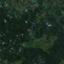

In [6]:
img = Image.open(fname)
img

In [7]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1,seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label, # extracts the label category from the image's folder name 
                 batch_tfms=aug_transforms(mult=2)) # data augmentation (mult multiplies the default transformation values)

In [8]:
dls = blocks.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


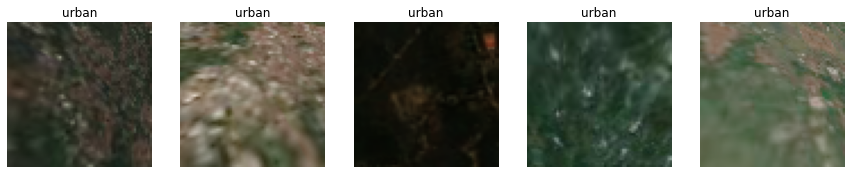

In [13]:
dls.show_batch(nrows=1, ncols=5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


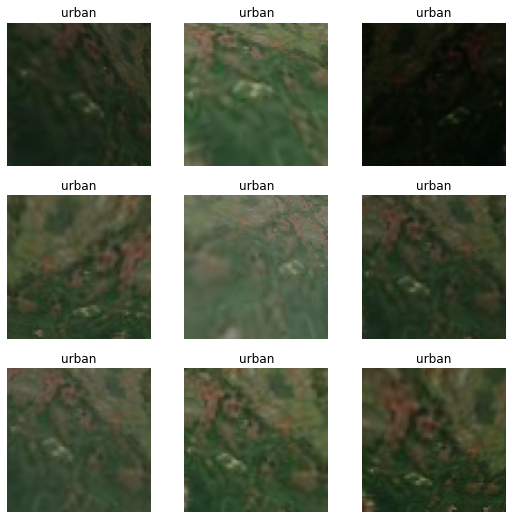

In [14]:
blocks = blocks.new(batch_tfms=aug_transforms(mult=2.0))
dls = blocks.dataloaders(path)
dls.train.show_batch(nrows=3, unique=True)

#### Densenet

In [ ]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s, roca]
learn = cnn_learner(dls, densenet121, metrics=metrics) 
learn.summary()

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\fastai\callback\schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.001737800776027143)

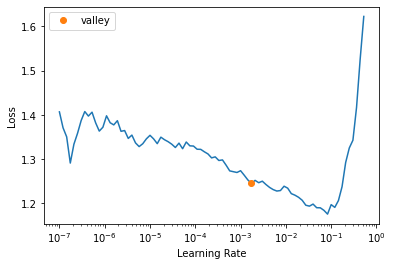

In [16]:
learn.lr_find()

In [ ]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(5, 0.0017)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,1.004134,0.531000,0.766387,0.681987,0.710225,0.681987,0.692273,0.788377,00:16
1,0.670929,0.428276,0.789916,0.738095,0.740733,0.738095,0.739383,0.848235,00:16
2,0.540502,0.408494,0.803361,0.704137,0.776437,0.704137,0.724734,0.872003,00:16
3,0.473202,0.393817,0.813445,0.718384,0.791602,0.718384,0.740153,0.877816,00:17
4,0.459566,0.392981,0.810084,0.712432,0.787669,0.712432,0.734145,0.877551,00:17


In [19]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.392645,0.407455,0.811765,0.713603,0.791334,0.713603,0.735832,0.883824,00:15
1,0.408640,0.382710,0.825210,0.728386,0.816076,0.728386,0.753450,0.892202,00:16
2,0.395806,0.376592,0.831933,0.745706,0.817220,0.745706,0.768756,0.894391,00:16
3,0.389268,0.389002,0.821849,0.720628,0.814740,0.720628,0.746095,0.894809,00:18
4,0.378968,0.375141,0.831933,0.740291,0.823102,0.740291,0.765319,0.895366,00:18


In [20]:
learn.export('C:/Users/jwst2/Python/tesis/models/18042022 D001.pkl')

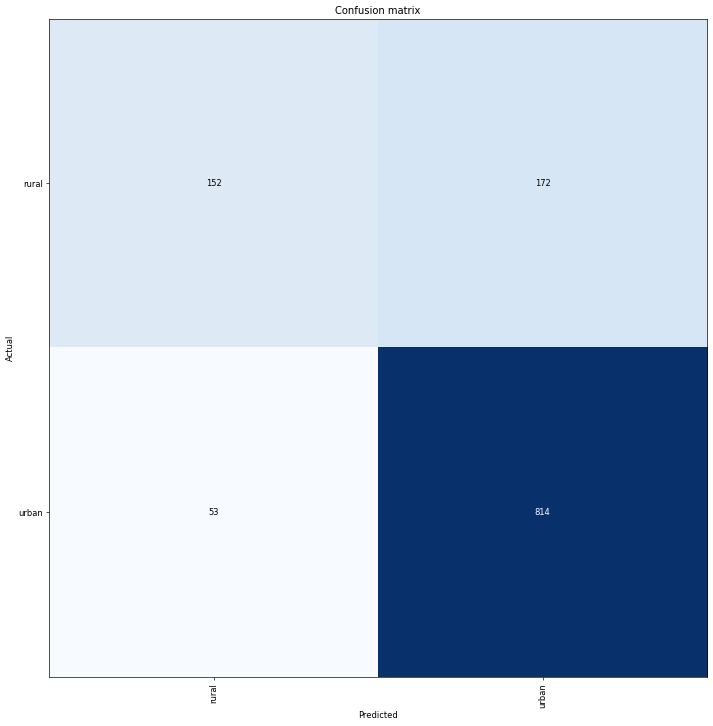

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [42]:
interp.most_confused(min_val=5)

[('rural', 'urban', 172), ('urban', 'rural', 53)]

#### Resnet

In [23]:
learn_rs = cnn_learner(dls, resnet50, metrics=metrics) 

In [ ]:
learn_rs.lr_find()

In [ ]:
learn_rs.unfreeze()

In [24]:
learn_rs.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,1.046618,0.729948,0.678992,0.682475,0.650980,0.682475,0.649721,0.738179,00:13
1,0.924093,0.588928,0.768067,0.731899,0.717412,0.731899,0.723446,0.789799,00:13
2,0.705852,0.480266,0.778151,0.720872,0.725879,0.720872,0.723256,0.820704,00:13
3,0.589281,0.418602,0.794958,0.721751,0.749725,0.721751,0.732787,0.853672,00:13
4,0.521476,0.416358,0.786555,0.708675,0.738573,0.708675,0.720052,0.857199,00:13
5,0.496184,0.403560,0.803361,0.729411,0.762280,0.729411,0.742095,0.868448,00:13
6,0.483254,0.398162,0.803361,0.714969,0.768874,0.714969,0.732650,0.870748,00:13
7,0.463433,0.393436,0.810084,0.734094,0.773297,0.734094,0.748738,0.873425,00:13
8,0.454653,0.403827,0.805042,0.701698,0.783350,0.701698,0.723584,0.873899,00:13
9,0.449716,0.398919,0.808403,0.707650,0.787379,0.707650,0.729744,0.876310,00:13


In [25]:
learn_rs.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.440758,0.395718,0.806723,0.710090,0.780526,0.710090,0.730789,0.876854,00:13
1,0.448507,0.392707,0.813445,0.718384,0.791602,0.718384,0.740153,0.877063,00:13
2,0.441367,0.393510,0.803361,0.695111,0.785038,0.695111,0.717519,0.879294,00:13
3,0.443397,0.386051,0.808403,0.729313,0.772126,0.729313,0.744823,0.878276,00:13
4,0.446061,0.385975,0.815126,0.726776,0.789024,0.726776,0.746852,0.881900,00:13
5,0.441580,0.394291,0.818487,0.721897,0.802647,0.721897,0.745267,0.879224,00:13
6,0.442773,0.388026,0.818487,0.727313,0.797379,0.727313,0.749039,0.880938,00:13
7,0.436333,0.384403,0.828571,0.746975,0.807022,0.746975,0.767471,0.882653,00:13
8,0.433462,0.391447,0.815126,0.721360,0.793543,0.721360,0.743132,0.880464,00:14
9,0.423796,0.387955,0.818487,0.730923,0.794309,0.730923,0.751454,0.881203,00:13


In [26]:
learn_rs.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.431360,0.389244,0.815126,0.717750,0.796990,0.717750,0.740550,0.880841,00:15
1,0.430404,0.385074,0.821849,0.742291,0.794125,0.742291,0.760576,0.880214,00:16
2,0.427565,0.381052,0.826891,0.745804,0.803724,0.745804,0.765738,0.884772,00:18
3,0.421078,0.374868,0.826891,0.749415,0.801030,0.749415,0.767882,0.886556,00:16
4,0.433591,0.381157,0.826891,0.745804,0.803724,0.745804,0.765738,0.884159,00:16


In [ ]:
plt.plot(L(learn_rs.recorder.values).itemgot(2));

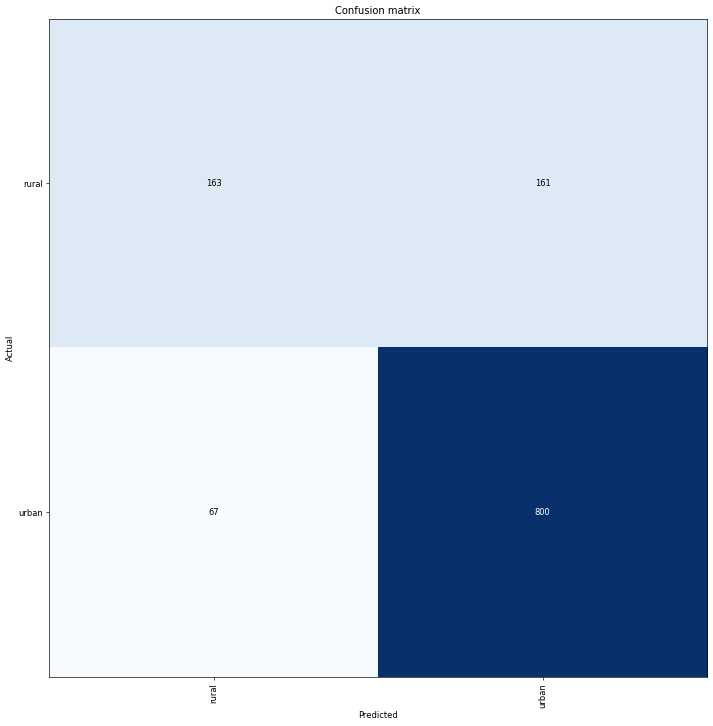

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_rs)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
learn_rs.export('C:/Users/jwst2/Python/tesis/models/18042020 R001.pkl')

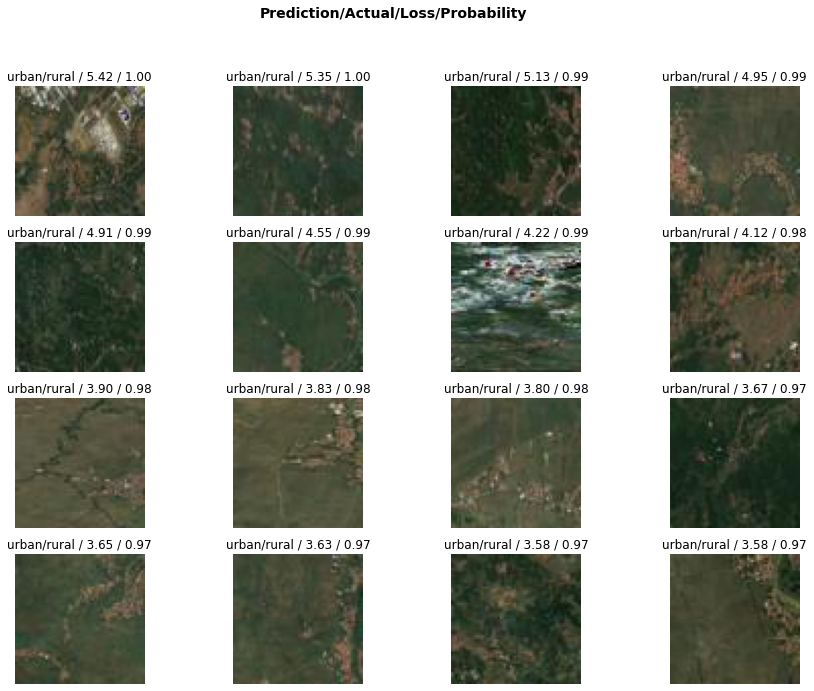

In [34]:
interp.plot_top_losses(16, figsize=(15,11))

### Create test

In [19]:
idx_train = []
for i in dls.valid.items:
    idx_train.append(str(i)[-14:-4])
true_label = []
for i in dls.valid.items:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [22]:
test = pd.DataFrame(idx_train)
test.columns = ["iddesa"] 

In [23]:
test.shape

(595, 1)

In [24]:
test.to_csv("C:/Users/jwst2/Python/tesis/dataset/datasplit_ur_desa.csv")